<a href="https://colab.research.google.com/github/ttadesusi/Artificial-Intelligence-Projects/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF HAND WRITTEN DIGITS (0-9) WITH SUPPORT VECTOR MACHINE**



## **DATA ACQUISITION**

In [1]:
# import dataframe and numpy package
import pandas as pd
import numpy as np

In [2]:
# read csv from google drive
image_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Lab/Data/digit-recognizer/train.csv")
image_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **DATA DESCRIPTION**

In [3]:
#descriptive statistics
image_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<Axes: >

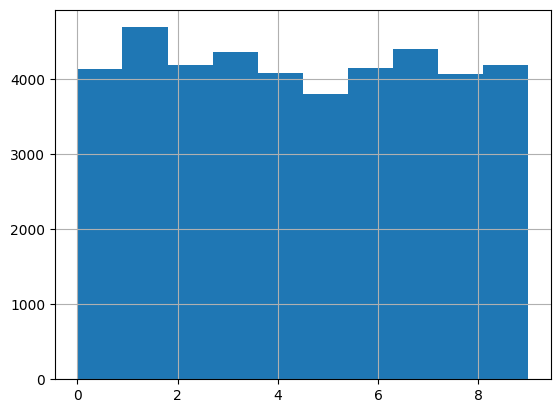

In [4]:
# data distribution
image_df.label.hist()

## **FEATURES AND TARGET**

In [5]:
# select features and target variables
feature_df = image_df.drop(['label'], axis=1)
X = np.asarray(feature_df)
y = np.asarray(image_df['label'])
X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## **DATA SPLITTING FOR MODEL BUILDING**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (33600, 784) (33600,)
Test set: (8400, 784) (8400,)


## **MODEL BUILDING and ACCURACY EVALUATION**

### **Support Vector Machine (SVM) Classifier**

In [7]:
# import and create smv classifier
from sklearn import svm
svm = svm.SVC(kernel='rbf')
svm

SVC()

In [8]:
# fit svm model 
svm.fit(X_train, y_train)

# predict test data 
y_pred = svm.predict(X_test)
print(y_pred[0:15])
print(y_test[0:15])

[0 2 1 1 0 8 9 4 7 0 6 9 7 7 5]
[0 2 1 1 0 8 9 4 7 0 6 9 7 7 5]


## **EVALUATION**


In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       821
           1       0.98      0.99      0.99       899
           2       0.97      0.98      0.98       858
           3       0.96      0.95      0.96       913
           4       0.96      0.98      0.97       791
           5       0.96      0.96      0.96       762
           6       0.98      0.98      0.98       808
           7       0.97      0.97      0.97       880
           8       0.97      0.97      0.97       789
           9       0.96      0.94      0.95       879

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

Confusion matrix, without normalization
[[811   0   1   0   2   2   2   0   2   1]
 [  0 891   0   2   0   1   1   3   1   0]
 [  1   1 838   1   4   0   0   5   6   2]
 [  0   4   8 869   1  15   1   4   8   3]
 [  1   0   1   0 772   1   4

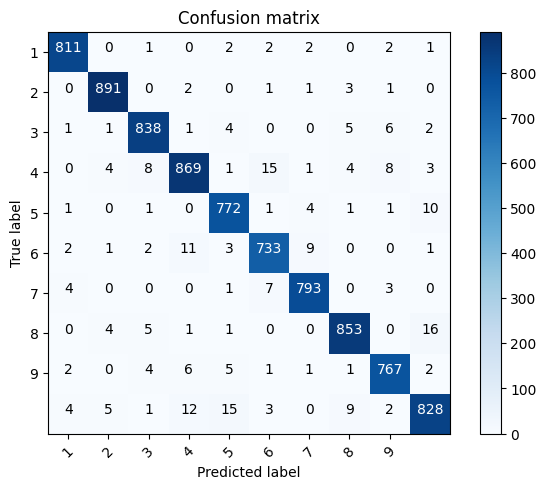

In [14]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9],normalize= False,  title='Confusion matrix')

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.9707958312979829

## **DEPLOYING MODEL ON SPEARATE TEST DATA**

In [16]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Lab/Data/digit-recognizer/test.csv")

test_X = np.asarray(test_df)
test_X[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
#scaler.fit(test_X).transform(test_X)

test_label = svm.predict(test_X)
test_label[0:5]

array([2, 0, 9, 9, 3])

In [18]:
test_label_df = pd.DataFrame(test_label)
test_label_df.columns = ['label']
test_label_df.index = test_label_df.index+1


test_label_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Lab/Data/digit-recognizer/test_label.csv")
test_label_df.head()

,label
1,2
2,0
3,9
4,9
5,3
